In [1]:
import os, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns ; sns.set()

from google.colab import drive
drive.mount('/content/drive')

sys.path.append("/content/drive/MyDrive/GSOC-NMR-project/Work/Notebooks")
from auxillary_functions import *
from polynomial_featextract import poly_featextract

Mounted at /content/drive


In [2]:
datadir_path = "/content/drive/MyDrive/GSOC-NMR-project/Work/Data/2021-06-21_classify_datagen_all_funcs"

In [3]:
# import raw data and params.txt file

rawdata = load_data(datadir_path)
params = load_params(datadir_path)
ker_integrals = load_wlist(datadir_path) # load wlist.txt file

# Stencil type : {'0' : 'Gaussian', '1' : 'Power Law', '2' : 'RKKY'}

Finished loading rawdata into numpy array
Finsihed loading parameters file
finished loading kernel-integrals file.


In [4]:
offset = 150
shifted_data, center = get_window(rawdata,2/3,width=offset)
print("The Echo pulse occurs at timestep:",center)

# Rescaled data
rscl_data = shifted_data / np.max(shifted_data,axis=1,keepdims=True)

The Echo pulse occurs at timestep: 628


# PCA tests

In [5]:
from sklearn.preprocessing import PowerTransformer, QuantileTransformer
from sklearn.decomposition import PCA

In [6]:
pt, qt = PowerTransformer(method="box-cox"), QuantileTransformer(output_distribution="normal")

In [7]:
ptdata = pt.fit_transform(rscl_data)
qtdata =  qt.fit_transform(rscl_data)

In [8]:
pca2d_ptdata, pca2d_ptvar = pca2D(ptdata)
print(pca2d_ptvar)

[0.43488138 0.19390574]


In [16]:
pca2d_qtdata, pca2d_qtvar = pca2D(qtdata)
print(pca2d_qtvar)

[0.4279739  0.18449325]


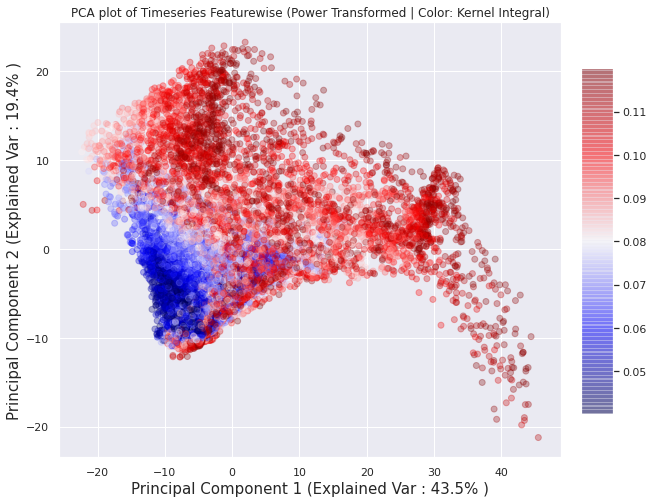

In [26]:
fig,ax = plt.subplots(figsize=(9,8))

cax = fig.add_axes([0.93, 0.2, 0.05, 0.6])

im = ax.scatter(pca2d_ptdata.PC1, pca2d_ptdata.PC2, alpha=0.3,
           c=ker_integrals.values, cmap='seismic')

ax.set_xlabel(f"Principal Component 1 (Explained Var : {pca2d_ptvar[0]*100 :.3}% )", fontsize=15)
ax.set_ylabel(f"Principal Component 2 (Explained Var : {pca2d_ptvar[1]*100 :.3}% )", fontsize=15)
ax.set_title("PCA plot of Timeseries Featurewise (Power Transformed | Color: Kernel Integral)")

fig.colorbar(im, cax=cax, orientation='vertical')
plt.show()

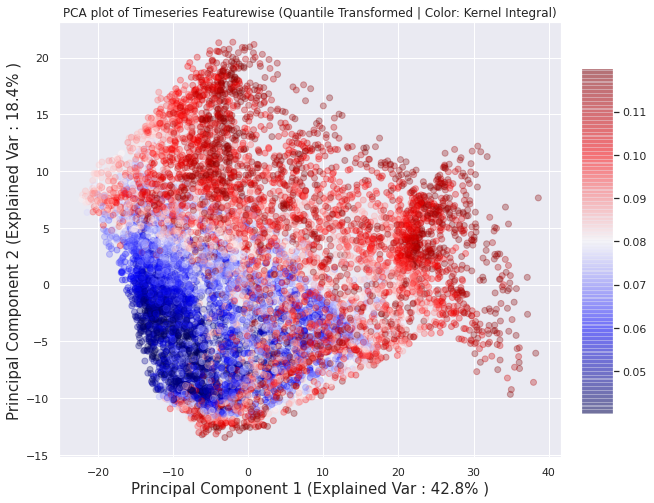

In [25]:
fig,ax = plt.subplots(figsize=(9,8))

cax = fig.add_axes([0.93, 0.2, 0.05, 0.6])

im = ax.scatter(pca2d_qtdata.PC1, pca2d_qtdata.PC2, alpha=0.3, 
           c=ker_integrals.values, cmap='seismic')

ax.set_xlabel(f"Principal Component 1 (Explained Var : {pca2d_qtvar[0]*100 :.3}% )", fontsize=15)
ax.set_ylabel(f"Principal Component 2 (Explained Var : {pca2d_qtvar[1]*100 :.3}% )", fontsize=15)
ax.set_title("PCA plot of Timeseries Featurewise (Quantile Transformed | Color: Kernel Integral)")

fig.colorbar(im, cax=cax, orientation='vertical')
plt.show()

### PCA based on length-scale

In [45]:
# To obtain length-scale

ls1 = params["ξ"][params["stencil_type"] == 0].values
ls2 = params["pow"][params["stencil_type"] == 1].values
ls3 = params["ξ"][params["stencil_type"] == 2].values

ls = np.hstack((ls1,ls2,ls3))

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

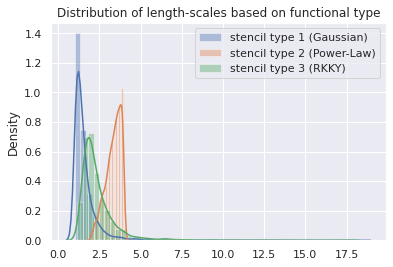

In [58]:
sns.distplot(ls1, label="stencil type 1 (Gaussian)")
sns.distplot(ls2, label="stencil type 2 (Power-Law)")
sns.distplot(ls3, label="stencil type 3 (RKKY)")

plt.title("Distribution of length-scales based on functional type")
plt.legend()
plt.show()

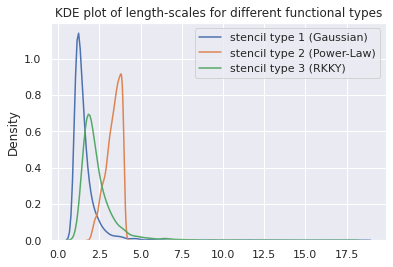

In [59]:
sns.kdeplot(ls1, label="stencil type 1 (Gaussian)")
sns.kdeplot(ls2, label="stencil type 2 (Power-Law)")
sns.kdeplot(ls3, label="stencil type 3 (RKKY)")

plt.title("KDE plot of length-scales for different functional types")

plt.legend()
plt.show()

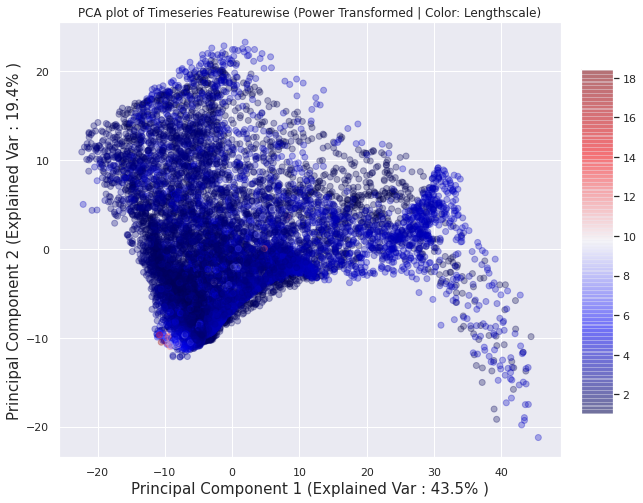

In [61]:
fig,ax = plt.subplots(figsize=(9,8))

cax = fig.add_axes([0.93, 0.2, 0.05, 0.6])

im = ax.scatter(pca2d_ptdata.PC1, pca2d_ptdata.PC2, alpha=0.3,
           c=ls, cmap='seismic')

ax.set_xlabel(f"Principal Component 1 (Explained Var : {pca2d_ptvar[0]*100 :.3}% )", fontsize=15)
ax.set_ylabel(f"Principal Component 2 (Explained Var : {pca2d_ptvar[1]*100 :.3}% )", fontsize=15)
ax.set_title("PCA plot of Timeseries Featurewise (Power Transformed | Color: Lengthscale)")

fig.colorbar(im, cax=cax, orientation='vertical')
plt.show()

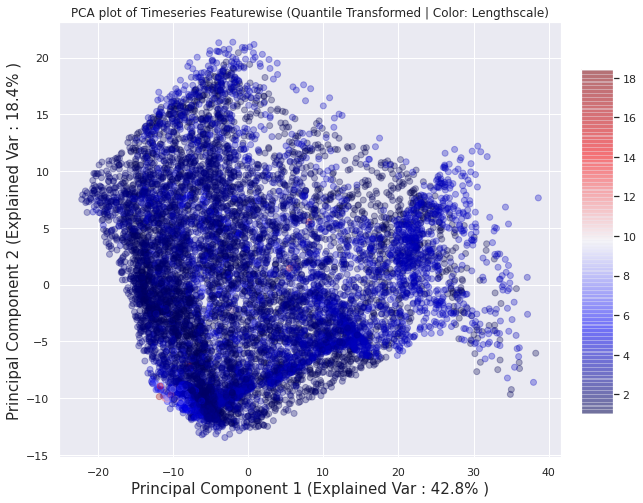

In [60]:
fig,ax = plt.subplots(figsize=(9,8))

cax = fig.add_axes([0.93, 0.2, 0.05, 0.6])

im = ax.scatter(pca2d_qtdata.PC1, pca2d_qtdata.PC2, alpha=0.3, 
           c=ls, cmap='seismic')

ax.set_xlabel(f"Principal Component 1 (Explained Var : {pca2d_qtvar[0]*100 :.3}% )", fontsize=15)
ax.set_ylabel(f"Principal Component 2 (Explained Var : {pca2d_qtvar[1]*100 :.3}% )", fontsize=15)
ax.set_title("PCA plot of Timeseries Featurewise (Quantile Transformed | Color: Lengthscale)")

fig.colorbar(im, cax=cax, orientation='vertical')
plt.show()